<a href="https://colab.research.google.com/github/anjali-ojha/deep-learning/blob/main/Anjali_Ojha_HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homwwork-2

## Use the code provided in demo 02 to complete this assignment.

## Step 1. Follow along with the tutorial to gain an understanding of the process.

In [3]:
%matplotlib inline

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

## Step 2. In a new .ipynb notebook, reproduce the results utilizing the "QMNIST" dataset

In [5]:
# Load Fashion MNIST dataset and preprocess
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.QMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.QMNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

100%|██████████| 9704059/9704059 [00:00<00:00, 187502699.46it/s]

Extracting ./data/QMNIST/raw/qmnist-train-images-idx3-ubyte.gz to ./data/QMNIST/raw


100%|██████████| 463024/463024 [00:00<00:00, 27392744.62it/s]

Extracting ./data/QMNIST/raw/qmnist-train-labels-idx2-int.gz to ./data/QMNIST/raw


100%|██████████| 9742279/9742279 [00:00<00:00, 199685678.58it/s]

Extracting ./data/QMNIST/raw/qmnist-test-images-idx3-ubyte.gz to ./data/QMNIST/raw


100%|██████████| 526800/526800 [00:00<00:00, 29979232.15it/s]

Extracting ./data/QMNIST/raw/qmnist-test-labels-idx2-int.gz to ./data/QMNIST/raw


In [9]:
def show_data(data):
    labels_map = {
        0: "Zero",
        1: "One",
        2: "Two",
        3: "Three",
        4: "Four",
        5: "Five",
        6: "Six",
        7: "Seven",
        8: "Eight",
        9: "Nine",
    }
    figure = plt.figure(figsize=(8, 8))
    cols, rows = 3, 3
    for i in range(1, cols * rows + 1):
        sample_idx = torch.randint(len(data), size=(1,)).item()
        img, label = data[sample_idx]
        figure.add_subplot(rows, cols, i)
        plt.title(labels_map[label])
        plt.axis("off")
        plt.imshow(img.squeeze(), cmap="gray")
    plt.show()

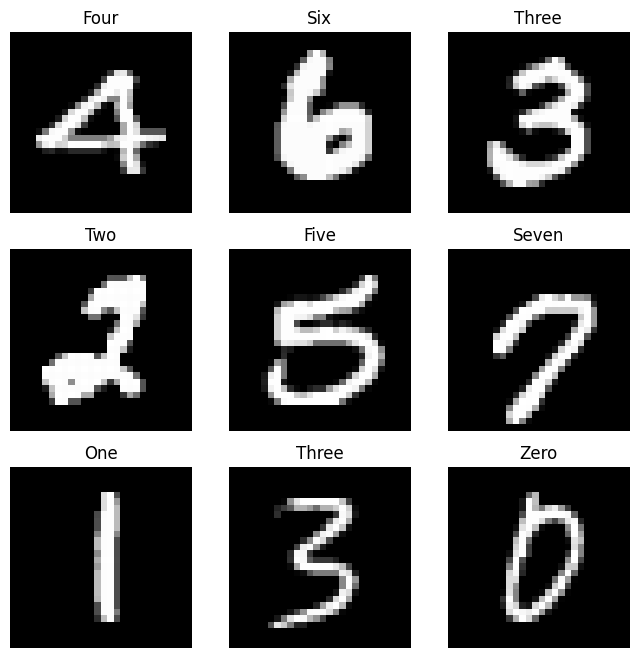

In [12]:
show_data(train_dataset)

In [15]:
def training(num_epochs, model, criterion, optimizer):

    # Train the neural network
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if i % 100 == 99:  # print every 100 mini-batches
                print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
                running_loss = 0.0

    print('Finished Training')
    return model

In [21]:
def evaluation(model, test_data):
    # Evaluate the model
    model.eval()
    predictions = []
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_data:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            predictions.extend(predicted.numpy())  # Store predictions
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy on test set: {correct / total * 100}%')
    return correct, total, predictions


In [17]:
def show_sample_result(model, images, labels):
    # Get one test image and its label
    image, label = images[1], labels[1]

    # Reshape the image tensor to a 28x28 shape
    image = image.view(28, 28)

    # Convert the image tensor to a numpy array for visualization
    image_numpy = image.numpy()

    # Show the image
    plt.imshow(image_numpy, cmap='gray')
    plt.title(f'Predicted Label: {predictions[1]}, Actual Label: {label.item()}')
    plt.axis('off')
    plt.show()


## Step 3. Report on the results in terms of prediction accuracy on the train and test datasets

In [18]:
# Initialize the neural network
#Define the neural network architecture
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model = MLP()
model = training(num_epochs=5,
                 model=model,
                 criterion = nn.CrossEntropyLoss(),
                 optimizer = optim.Adam(model.parameters(), lr=0.001))
correct, total, predictions = evaluation(model=model, test_data=test_loader)
# show_sample_result(model=model, )

Epoch 1, Batch 100, Loss: 1.0293946778774261
Epoch 1, Batch 200, Loss: 0.422243584394455
Epoch 1, Batch 300, Loss: 0.4053815460205078
Epoch 1, Batch 400, Loss: 0.363138472288847
Epoch 1, Batch 500, Loss: 0.31186510786414146
Epoch 1, Batch 600, Loss: 0.30651481963694094
Epoch 1, Batch 700, Loss: 0.2847393447160721
Epoch 1, Batch 800, Loss: 0.2686259937286377
Epoch 1, Batch 900, Loss: 0.2520951060205698
Epoch 2, Batch 100, Loss: 0.2265528367459774
Epoch 2, Batch 200, Loss: 0.21426969900727272
Epoch 2, Batch 300, Loss: 0.2098431581258774
Epoch 2, Batch 400, Loss: 0.20498727183789014
Epoch 2, Batch 500, Loss: 0.18428351260721684
Epoch 2, Batch 600, Loss: 0.19214443039149046
Epoch 2, Batch 700, Loss: 0.18045929789543153
Epoch 2, Batch 800, Loss: 0.18327367920428514
Epoch 2, Batch 900, Loss: 0.16162763223052024
Epoch 3, Batch 100, Loss: 0.16062510687857867
Epoch 3, Batch 200, Loss: 0.1537906283326447
Epoch 3, Batch 300, Loss: 0.14838563747704028
Epoch 3, Batch 400, Loss: 0.1510808441787958
E

## Step 4. Choose one of the proposed modifications below:

### 1 - Add another Dense layer of 128 nodes

In [22]:
#Define the neural network architecture
class MLP_New_Layer(nn.Module):
    def __init__(self):
        super(MLP_New_Layer, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize the neural network
model_new_layer = MLP_New_Layer()

model_new_layer = training(num_epochs=5,
                          model=model_new_layer,
                          criterion = nn.CrossEntropyLoss(),
                          optimizer = optim.Adam(model_new_layer.parameters(), lr=0.001))

correct_new_layer, total_new_layer, predictions_new_layer = evaluation(model=model_new_layer, test_data=test_loader)

Epoch 1, Batch 100, Loss: 1.0557862734794616
Epoch 1, Batch 200, Loss: 0.4555537451803684
Epoch 1, Batch 300, Loss: 0.3639594384282827
Epoch 1, Batch 400, Loss: 0.34342685133218764
Epoch 1, Batch 500, Loss: 0.2965361098200083
Epoch 1, Batch 600, Loss: 0.2831004522740841
Epoch 1, Batch 700, Loss: 0.2767154245823622
Epoch 1, Batch 800, Loss: 0.2469369687885046
Epoch 1, Batch 900, Loss: 0.23450019970536232
Epoch 2, Batch 100, Loss: 0.22320871111005544
Epoch 2, Batch 200, Loss: 0.19778829269111156
Epoch 2, Batch 300, Loss: 0.15882108859717847
Epoch 2, Batch 400, Loss: 0.17817970786243678
Epoch 2, Batch 500, Loss: 0.17152989614754915
Epoch 2, Batch 600, Loss: 0.17838418278843166
Epoch 2, Batch 700, Loss: 0.15391884109005333
Epoch 2, Batch 800, Loss: 0.16462317006662489
Epoch 2, Batch 900, Loss: 0.1556646316871047
Epoch 3, Batch 100, Loss: 0.1391058664396405
Epoch 3, Batch 200, Loss: 0.12227777240797877
Epoch 3, Batch 300, Loss: 0.12258778370916844
Epoch 3, Batch 400, Loss: 0.135621621161699

### Increase the current number of nodes in the layer to 256

In [23]:
#Define the neural network architecture
class MLP_Wide_Layer(nn.Module):
    def __init__(self):
        super(MLP_Wide_Layer, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the neural network
model_wide_layer = MLP_Wide_Layer()
model_wide_layer = training(num_epochs = 5,
                           model = model_wide_layer,
                           criterion = nn.CrossEntropyLoss(),
                           optimizer = optim.Adam(model_wide_layer.parameters(), lr=0.001))


correct_wide_layer, total_wide_layer, predictions_wide_layer = evaluation(model=model_wide_layer, test_data=test_loader)

Epoch 1, Batch 100, Loss: 0.9424272522330284
Epoch 1, Batch 200, Loss: 0.4240418589115143
Epoch 1, Batch 300, Loss: 0.36668951243162157
Epoch 1, Batch 400, Loss: 0.3067842849344015
Epoch 1, Batch 500, Loss: 0.3175462307780981
Epoch 1, Batch 600, Loss: 0.2699220734089613
Epoch 1, Batch 700, Loss: 0.26662443809211256
Epoch 1, Batch 800, Loss: 0.2528781507909298
Epoch 1, Batch 900, Loss: 0.2271076226606965
Epoch 2, Batch 100, Loss: 0.20904256656765938
Epoch 2, Batch 200, Loss: 0.17788081422448157
Epoch 2, Batch 300, Loss: 0.1904704776033759
Epoch 2, Batch 400, Loss: 0.17190067730844022
Epoch 2, Batch 500, Loss: 0.1460217322781682
Epoch 2, Batch 600, Loss: 0.16180873159319162
Epoch 2, Batch 700, Loss: 0.14768457766622306
Epoch 2, Batch 800, Loss: 0.14939487632364035
Epoch 2, Batch 900, Loss: 0.14207249365746974
Epoch 3, Batch 100, Loss: 0.11458298670127988
Epoch 3, Batch 200, Loss: 0.12878924099728464
Epoch 3, Batch 300, Loss: 0.13697102658450602
Epoch 3, Batch 400, Loss: 0.125617091748863

## Step 6. Report on the results of the modified model and if it matches your hypothesis

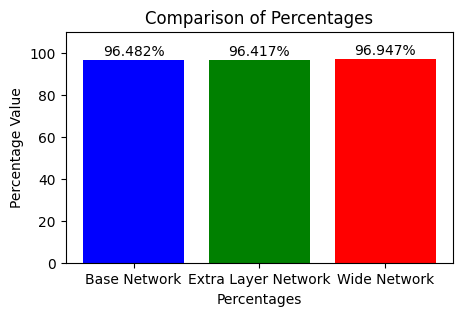

In [38]:
import matplotlib.pyplot as plt

# Define the percentages
base_accuracy = correct / total * 100
new_layer_accuracy = correct_new_layer / total * 100
wide_accuracy = correct_wide_layer / total * 100

# Define the labels for the bars
labels = ['Base Network', 'Extra Layer Network', 'Wide Network']

# Define the values for the bars
values = [base_accuracy, new_layer_accuracy, wide_accuracy]

# Create the bar chart
plt.figure(figsize=(5, 3))
bars = plt.bar(labels, values, color=['blue', 'green', 'red'])

# Add percentage values on top of the bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{value:.3f}%', ha='center', va='bottom')

plt.ylim(0, 110)
# Add title and labels
plt.title('Comparison of Percentages')
plt.xlabel('Percentages')
plt.ylabel('Percentage Value')

# Show the plot
plt.show()

## Step 7. Experiment with different optimizers, loss functions, dropout, and activation functions, and observe the change in performance as you tune these hyperparameters.

In [6]:
#Define the neural network architecture
class MLP_Flex(nn.Module):
    def __init__(self, activation_function, dropout):
        super(MLP_Flex, self).__init__()
        self.activation_function = activation_function
        self.dropout = dropout
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.dropout_fuction = nn.Dropout(p=dropout)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.activation_function(self.fc1(x))
        x = self.dropout_fuction(x)
        x = self.activation_function(self.fc2(x))
        x = self.dropout_fuction(x)
        x = self.fc3(x)
        return x


In [22]:
optimizers = [optim.SGD, optim.Adam, optim.RMSprop]
loss_functions = [nn.CrossEntropyLoss(), nn.MSELoss()]
dropouts = [0.0, 0.2, 0.5]
activation_functions = [nn.ReLU(), nn.Sigmoid()]

for optimizer in optimizers:
    for loss_function in loss_functions:
        for dropout in dropouts:
            for activation_function in activation_functions:
                print(f'''
                          Optimizer: {optimizer.__name__},
                          Loss Function: {loss_function.__class__.__name__},
                          Dropout Rate: {dropout},
                          Activation: {activation_function.__class__.__name__}
                      ''')

                model = MLP_Flex(activation_function=activation_function, dropout=dropout)
                training(num_epochs = 1,
                         model = model,
                         criterion = loss_function,
                         optimizer = optimizer(model.parameters(), lr=0.001))
                correct, total, predictions = evaluation(model=model, test_data=test_loader)
                break
                print('\n')


                          Optimizer: SGD, 
                          Loss Function: CrossEntropyLoss, 
                          Dropout Rate: 0.0, 
                          Activation: ReLU
                      
Epoch 1, Batch 100, Loss: 2.2931670117378236
Epoch 1, Batch 200, Loss: 2.277816734313965
Epoch 1, Batch 300, Loss: 2.2642165088653563
Epoch 1, Batch 400, Loss: 2.2431892800331115
Epoch 1, Batch 500, Loss: 2.226974937915802
Epoch 1, Batch 600, Loss: 2.2097926235198972
Epoch 1, Batch 700, Loss: 2.190349287986755
Epoch 1, Batch 800, Loss: 2.1708854246139526
Epoch 1, Batch 900, Loss: 2.1399853587150575
Finished Training
Accuracy on test set: 0.4533333333333333%

                          Optimizer: SGD, 
                          Loss Function: CrossEntropyLoss, 
                          Dropout Rate: 0.2, 
                          Activation: ReLU
                      
Epoch 1, Batch 100, Loss: 2.290478377342224
Epoch 1, Batch 200, Loss: 2.2789035081863402
Epoch 1, Batch 30

KeyboardInterrupt: 